In [539]:
 #!/usr/bin/env python

In [540]:
"""Data Wrangling with Pandas"""

'Data Wrangling with Pandas'

# Lesson 5 Assignment

In [541]:
import pandas as pd
import matplotlib.pyplot as plt 

In [542]:
pd.options.display.max_rows = 5000

To be able to view the data in its entirety, I set the maximum rows to display to 5000.

1. Upload Registration.csv and Course_info.xlsx into Pandas. (5 points)

In [543]:
reg_data = pd.read_csv('Registration.csv')
course_data = pd.read_excel('Course_info.xlsx')

2. Explore and clean Registration data. (30 points)

In [ ]:
reg_data

In [545]:
reg_data.describe()

,Student name,semester new,coursename
count,4900,4900,4899
unique,448,16,168
top,Ed McMahon,Spring 2002,COMPUT LINEAR ALGEBRA
freq,52,486,411


The `describe()` function tells me a little bit about the data. Firstly, there appears to be 4900 rows in each column except `coursename`. I will investigate more into this null value later. Next, there are 448 unique students, 16 different semesters, and 168 unique course names. Finally, the more frequent occurences for each column are Ed McMahon with 52 enrollments, the Spring 2002 semester with 486 enrollments, and COMPUTE LINEAR ALGEBRA with 411 enrollments.

In [546]:
reg_data.rename(columns={"Student name": "student_name", "semester new": "semester", "coursename": "course_name"}, inplace=True)

To make my exploration easier, I will begin by renaming each column using lower case and underscores.

Next, I would like to visualize the enrollments of each semester. I use the `value_counts()` function to create a dictionary to be used for plotting.

In [547]:
semester_counts = dict(reg_data.semester.value_counts())


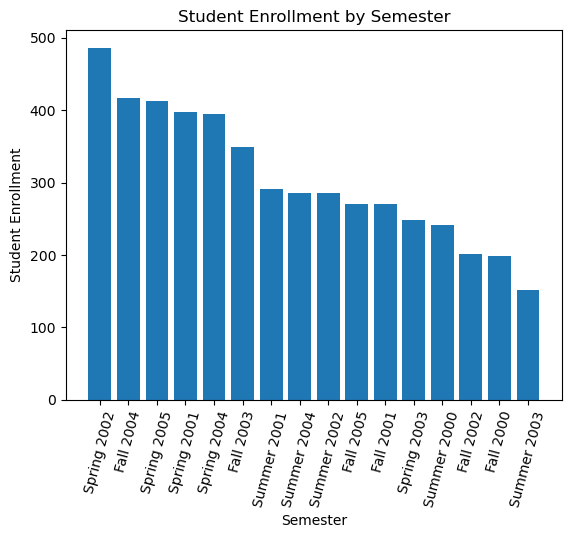

In [548]:
fig, ax = plt.subplots()
ax = plt.bar(list(semester_counts.keys()), list(semester_counts.values()))
plt.title('Student Enrollment by Semester')
plt.xlabel('Semester')
plt.ylabel('Student Enrollment')
plt.xticks(rotation=75)
plt.show()

The bar chart further supports the fact that Spring 2002 is the most enrolled semester. It also shows that Summer 2003 is the least enrolled semester. Of all enrollment counts, the median appears to be between Summer 2004 and Summer 2002, which have nearly equivalent enrollment. I also observed that Spring semesters seem fairly popular with 80% of all spring semesters having enrollment greater than the median. Contrastingly, summer semester seem to be least popular with 60% of summer semesters having enrollment below the median and the remaining 40% having enrollment very close to the median.

In [549]:
reg_data.isnull().sum(axis=0)

student_name    0
semester        0
course_name     1
dtype: int64

While investigating null values, I confirm that a null value appears in the column renamed to `course_name`.

In [550]:
reg_data[reg_data.isnull().any(axis=1)]

,student_name,semester,course_name
1650,John Jakes,Summer 2003,NaN


In [551]:
reg_data[reg_data.student_name == 'John Jakes']

,student_name,semester,course_name
1648,John Jakes,Summer 2001,FRANCE AND ITS OTHERS: Anthropology and French...
1649,John Jakes,Spring 2004,AMERICAN FOREIGN POLICY
1650,John Jakes,Summer 2003,NaN
1651,John Jakes,Spring 2001,COMPUT LINEAR ALGEBRA
1652,John Jakes,Spring 2001,Environmental Case Studies
1653,John Jakes,Spring 2004,ANALYTICAL MECHANICS
1654,John Jakes,Spring 2005,FR LIT OF THE 19TH C: STUDIES IN THE 19TH C.
1655,John Jakes,Summer 2000,ANTHROPOLOGY AND CINEMA
1656,John Jakes,Summer 2000,COMP POL. WELFARE STATE
1657,John Jakes,Summer 2001,ARCHAEOL GREC-ROM RELIG


In [552]:
reg_data.drop(index=1650, inplace=True)

Because row 1650 is the only occurence of John Jake's enrollment in the Summer 2003 semester, I will remove the row entirely.

In [553]:
reg_data.course_name = reg_data.course_name.str.lower()

There are lots of inconsistencies in the `course_name` column. I begin to address this by making the entire column lower case using the `str.lower()` method.

In [554]:
course_names = list(reg_data.course_name.unique())
course_names.sort()
print(course_names)

['1000 yrs musical listeng: 1000 yrs musical listeng', '19th-cent british lit', '19th-cent novel', '1st yr classical chin ii', '20th century russian literature: fiction and reality', '20th-cent poetry', 'a world at war', 'abnormal psychology', 'accel intermd portuguese', 'accel intermediate span', 'accelerated hindi', 'accelerated intermd grmn', 'aesthetics', 'afghanistan & islamism: afghanistan & islamism', 'african lang. & culture', 'african-american lit', 'african-american lit: african-amer lit:change', 'afro amer hist 1876-pres', 'amer post-1800: bf sem: modern american cities', 'amer revolution', 'america in the 1960s', 'american foreign policy', 'american healt policy', 'american health policy', 'american musical theatre', 'american poetry', 'american society', 'american south 1861-pres', 'anal meth econ, law med', 'analytical mechanics', 'analyzing the pol world', 'ancient rome', 'animal behavior', 'animal cognition', 'anth & the modern world: afghanistan, iran, pakistan', 'anth

I continued by using the `unique()` method to get all unique course names, then sorting them as a list to easily identify different variations of the same course name. From here, I made a dictionary named `clean_course_names` where each key was a course name and its values are a list of all the variations that appeared for that name.

In [555]:
course_names_dict = {'cell biology and biochemistry': ['cel and bio and biochemistry', 'cel bio biochemistry', 'cell and bio and biochemistry', 'cell biol & biochem', 'cell biology & biochem', 'cell biology and biochem', 'cell biology and biochemistry', 'cell. biol. & biochem.', 'cell. biol. and biochem.'], 
                      'business german: a micro perspective': ['business german - micro perspective', 'business german a micro perspective', 'business german, a micro perspective', 'business german: a micro perspective'], 
                      'american health policy': ['american healt policy'],
                      'anthropology and cinema': ['anthropology & cinema'], 
                      'art: ancient to 1945': ['art - ancient to 1945', 'art - from ancient to 1945', 'art ancient to 1945', 'art, from ancient to 1945'], 
                      'communications internship': ['communications internshp'], 
                      'computer linear algebra': ['comput linear algebra'], 
                      'contemporary art: 1945 to present': ['contemp art - 1945 to present', 'contemp art - 1945 to today', 'contemp art - since 1945', 'contemp art:1945 to present'], 
                      'contemporary african art': ['contemporary african-art'], 
                      'drugs, brain, and mind': ['drugs, brain and mind'], 
                      'early mesopotamian history/society': ['early mesopotam hist - soc', 'early mesopotam hist/soc', 'early mesopotamian hist - soc', 'early mesopotam history/society'], 
                      'evidenced based crime and justice policy': ['evidenced based crime & justice policy'], 
                      '19th century british literature': ['19th-cent british lit', '19th-century british literature'], 
                      'art and religion': ['art & religion'], 
                      'comm and the presidency': ['comm & the presidency', 'comm and  the presidency'], 
                      'american south 1861-present': ['american south 1861-present'], 
                      'experimental writing sem: the ecology of poetry': ['experimental writing sem'], 
                      'environmental studies research seminar junior level': ['environmental studies research seminar for juniors'], 
                      'contemporary socio theory': ['contemporary socio theor'], 
                      'augustan cultural revolution': ['augustan cultral revolution', 'augustan cultrl revol'], 
                      'french thought since 1945': ['french thought till 1945']
                      }

In [556]:
def clean_course_names(c_dict, data):
    """Returns dataframe with cleaned course names as directed by input dictionary."""
    for c_name in c_dict:
        data['course_name'] = data['course_name'].replace(c_dict[c_name], c_name)
    return data


In [557]:
reg_data = clean_course_names(course_names_dict, reg_data)

In [558]:
course_names = list(reg_data.course_name.unique())
course_names.sort()
print(len(course_names))
print(course_names)

137
['1000 yrs musical listeng: 1000 yrs musical listeng', '19th century british literature', '19th-cent novel', '1st yr classical chin ii', '20th century russian literature: fiction and reality', '20th-cent poetry', 'a world at war', 'abnormal psychology', 'accel intermd portuguese', 'accel intermediate span', 'accelerated hindi', 'accelerated intermd grmn', 'aesthetics', 'afghanistan & islamism: afghanistan & islamism', 'african lang. & culture', 'african-american lit', 'african-american lit: african-amer lit:change', 'afro amer hist 1876-pres', 'amer post-1800: bf sem: modern american cities', 'amer revolution', 'america in the 1960s', 'american foreign policy', 'american health policy', 'american musical theatre', 'american poetry', 'american society', 'american south 1861-pres', 'anal meth econ, law med', 'analytical mechanics', 'analyzing the pol world', 'ancient rome', 'animal behavior', 'animal cognition', 'anth & the modern world: afghanistan, iran, pakistan', 'anth of global 

After cleaning the course names, there are only 138 uniqe course names versus 168 before cleaning.

3. Explore and clean Course info data. (10 points)

In [ ]:
course_data

In [560]:
course_data.describe()

,Course number,Course Name,Course Type
count,42,41,42
unique,42,40,3
top,ARTS400,FRANCE & THE EUROP.UNION,E
freq,1,2,33


The `describe()` function tells me a little bit about the data. Firstly, there appears to be 42 rows in each column except `Course Name`. I will investigate more into this null value later. Next, there are 42 unique course numbers and 3 different course types. There appears to be a duplicate course name 'FRANCE & THE EUROP.UNION' that appears twice. Finally, the more frequent course type is course type E with 33 course under this categorization.

In [561]:
course_data.columns

Index(['Course number', 'Course Name ', 'Course Type'], dtype='object')

Similar to the registration data, I renamed each column using lower case and underscores to simplify exploration.

In [562]:
course_data.rename(columns={"Course number": "course_nbr", "Course Name ": "course_name", "Course Type": "course_type"}, inplace=True)

In [563]:
course_data.course_name = course_data.course_name.str.lower()

In [564]:
course_data.drop(index=36, inplace=True)

I removed the duplicate course name.

In [565]:
course_data.isnull().sum(axis=0)

course_nbr     0
course_name    1
course_type    0
dtype: int64

In [566]:
course_data[course_data.isnull().any(axis=1)]

,course_nbr,course_name,course_type
31,ARTS567,NaN,E


In [567]:
course_data.drop(index=31, inplace=True)

There is no way to know what the course name responding to course number ARTS567 is so I will remove this row.

In [568]:
course_type_counts = dict(course_data.course_type.value_counts())

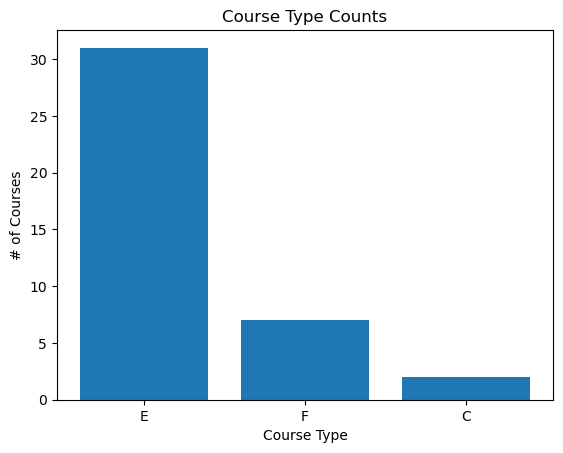

In [569]:
fig, ax = plt.subplots()
ax = plt.bar(list(course_type_counts.keys()), list(course_type_counts.values()))
plt.title('Course Type Counts')
plt.xlabel('Course Type')
plt.ylabel('# of Courses')
#plt.xticks(rotation=75)
plt.show()

There is a large variance in the distribution of course type counts. There are more than double the amount of course labeled as E type than there are in F and C type courses combined.

In [570]:
course_data = clean_course_names(course_names_dict, course_data)

I applied the `clean_course_names` function to the course data to ensure matching of all courses present in both datasets.

4. Which course has the highest registration? (15 points)

In [572]:
reg_data.course_name.value_counts()

computer linear algebra                                         438
environmental case studies                                      402
a world at war                                                  368
behavioral pharmacology                                         354
analytical mechanics                                            350
contemporary african art                                        290
american foreign policy                                         235
experimental writing sem: the ecology of poetry                 220
american health policy                                          182
food/feast arch of table                                        151
cell biology and biochemistry                                   109
elementary french i                                             102
elementary arabic ii                                             80
being human: being human: biology, culture & human diversity     75
communications internship                       

Computer linear algebra is the highest registered course with 438 enrollments.

5. Inner join two datasets. (20 points)

In [573]:
full_data = pd.merge(reg_data, course_data, on='course_name')

To inner join both data sets, I used the `merge()` function from the pandas librarym which has a default join method of inner. I used the course name as the column to join both datasets.

6. Create a data frame with student names as the index, course numbers as columns, and if the student registered a course as values (0, 1). (20 points)

In [581]:
dummies = pd.get_dummies(full_data.course_nbr)

Firstly, I created the dummy data using only the `course_nbr` column. This step maintained the indices of the data so in the next step, I was able to join the dummy data with the student_name on the indices of both dataframes.

In [587]:
final_data = pd.merge(full_data.student_name, dummies, left_index=True, right_index=True)

Next, I grouped the data by the student_name and applied the `max()` method to only have one row per student and still show all their enrollments.

In [ ]:
final_data = final_data.groupby(['student_name']).max()

Finally, I set `student_name` as the index and dropped the column.

In [ ]:
final_data.set_index(final_data.student_name, inplace=True, drop=True)

In [ ]:
final_data